In [1]:
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Importing data from file

In [2]:
# Read data from ./coauthorship/coauthorship_cond-mat/cond-mat.net
A = np.zeros((16726,16726))
with open("./coauthorship/coauthorship_cond-mat/cond-mat.net", "r") as data_file:
    for line in data_file.readlines():
        i, j = [int(k) for k in line.split()]
        A[i][j] = 1
        A[j][i] = 1
        
D = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i][i] = np.sum(A[i])

In [3]:
# Determining which nodes are in the largest component using DFS
def connected_component(A, i): # A: adjacency matrix, i: node to find component
    visited = []
    S = []
    S.append(i)
    while(len(S) > 0):
        v = S.pop()
        print(len(visited))
        if(v not in visited):
            visited.append(v)
            for d in range(A.shape[0]):
                if(A[v][d] == 1):
                    S.append(d)
                
    return visited

# We can use NetworkX instead for speed.
G = nx.convert_matrix.from_numpy_array(A)
C_n = max(nx.connected_components(G))
C = G.subgraph(max(nx.connected_components(G)))

# Computing $L_i$ and its distribution

Note that $\displaystyle L_i=\frac{1}{N-1}\sum_{j\ne i}d_{ij}$, where $d_{ij}$ is the distance between nodes $i$ and $j$.
Futhermore, note that $\displaystyle c_i = \begin{cases}\frac{K[G_i]}{k_i(k_i-1)/2} & k_i \ge 2 \\ 0 & k_i = 0,1\end{cases}$, where $K[G_i] = \displaystyle \frac{1}{2}(A^3)_{ii}$ and $k_i=D_{ii}$ is the degree of node $i$.

In [4]:
# Average path length
L_i = dict([(k, np.average(list(nx.shortest_path_length(C,k).values()))) for k in tqdm(C_n)])

# Save L_i values (25m to calculate)
with open("./coauthorship/coauthorship_cond-mat/average-dist.txt", "w+") as dist_file:
    dist_file.write(str(L_i))
    dist_file.close()

100%|██████████| 13861/13861 [49:06<00:00,  4.70it/s]    


In [5]:
# clustering
c_i = nx.clustering(G)

In [6]:
# Calculate L = (1/N) ∑ L_i, the characteristic path length
L = np.average(list(L_i.values()))

# Calculate C = (1/N) ∑ c_i, the clustering coefficient of the graph
C = np.average(list(c_i.values()))

L, C

(6.62735073477655, 0.6203627534751613)

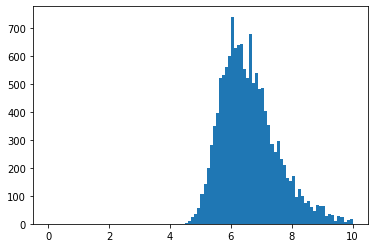

In [8]:
%matplotlib inline
# Plot L_i distribution as histogram.
L_dist = plt.hist(L_i.values(), bins=np.linspace(0,10,101))
plt.show()